In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from prophet import Prophet
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
#from sklearn.preprocessing import MinMaxScaler
from fitter import Fitter
import math
from datetime import datetime as dt
from datetime import datetime, timedelta
from matplotlib.ticker import PercentFormatter

In [359]:
df=pd.read_excel(r"C:\Users\HP\OneDrive\Pictures\Desktop\ritvik_temp\F13 to F20.xlsx",sheet_name="kwhF13")


In [360]:
df.head(103)

,Date,Comp.-1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Chassis,"Jost-1,PTC & Boiler",Jost-2,...,Tr.Light,Tool room/Comp. cooling,Short Blasting,"SQF 1,2,3",Admn block &\nCanteen,\nInd. Hard,Assy. Shop,Total Power Consumption,Unnamed: 28,Unnamed: 29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01.04.2012,0,259,0,2400.0,110.0,750,800.0,710.0,690.0,...,1380.0,1180.0,4050.0,3080.0,940.0,150.0,50.0,27648.0,NaN,NaN
2,02.04.2012,0,0,0,290.0,0,2230.0,120.0,940.0,60.0,...,1090.0,1230.0,3540.0,2770.0,430.0,190.0,50.0,17802.0,NaN,NaN
3,03.04.2012,0,0,31,1540.0,320.0,2290.0,4230.0,5690.0,1510.0,...,770.0,2910.0,3980.0,2960.0,910.0,560.0,830.0,41295,NaN,NaN
4,04.04.2012,0,0,0,1360.0,40.0,2430.0,4550.0,5570.0,1450.0,...,1530.0,2370.0,4880.0,4690.0,1140.0,370.0,990.0,44227.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,01.07.2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Total,0,0,865,33910.0,3290.0,57990.0,106000,119000,36970.0,...,36480.0,58525.0,115790.0,74290.0,57380.0,17210.0,22950.0,1037536.0,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Date,Comp.-1,Comp.-2,Comp.-3,Comp.-4,Comp.-5,Comp.-6,Chassis,"Jost-1,PTC,Boiler",Jost-2,...,Tr. Light,Tool room/Comp.cooling,S.Blasting,"SQF 1,2,3",Admn block\nCanteen,Ind.Harding,Assembly\nmachine,Total Power Consumption,NaN,NaN


In [361]:
dropper=[]
df.dropna(how="all",inplace=True)
df
df=df[["Date","Total Power Consumption"]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Power consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df

,Date,Total Power Consumption
0,01.04.2012,27648.0
1,02.04.2012,17802.0
2,03.04.2012,41295
3,04.04.2012,44227.0
4,05.04.2012,43175.0
...,...,...
361,27.03.2013,13348.0
362,28.03.2013,28252.0
363,29.03.2013,35998.0
364,30.03.2013,13981.0


In [362]:
df.rename(columns={"Date":"ds","Total Power Consumption":"y"},inplace=True)


In [363]:
df_f=df.copy()

In [364]:
df=pd.read_excel(r"C:\Users\HP\OneDrive\Pictures\Desktop\ritvik_temp\F13 to F20.xlsx",sheet_name="KWH F14 and F15")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total Consumption"]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="TOTAL":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total Consumption":"y"},inplace=True)
df_f=pd.concat([df_f,df])


df=pd.read_excel(r"C:\Users\HP\OneDrive\Pictures\Desktop\ritvik_temp\F13 to F20.xlsx",sheet_name="KWH F16")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total Consumption"]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total Consumption":"y"},inplace=True)
df_f=pd.concat([df_f,df])



df=pd.read_excel(r"C:\Users\HP\OneDrive\Pictures\Desktop\ritvik_temp\F13 to F20.xlsx",sheet_name="KWH F17")
dropper=[]
#print(df.columns)
df.dropna(how="all",inplace=True)
#print(df.columns)
df=df[["Date","Total Consumption"]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]==" Total":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total Consumption":"y"},inplace=True)
df_f=pd.concat([df_f,df])


df=pd.read_excel(r"C:\Users\HP\OneDrive\Pictures\Desktop\ritvik_temp\F13 to F20.xlsx",sheet_name="KWH F18")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total "]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Power consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total ":"y"},inplace=True)
df_f=pd.concat([df_f,df])



df=pd.read_excel(r"C:\Users\HP\OneDrive\Pictures\Desktop\ritvik_temp\F13 to F20.xlsx",sheet_name="KWH F19")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total"]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Power consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total":"y"},inplace=True)
df_f=pd.concat([df_f,df])


df=pd.read_excel(r"C:\Users\HP\OneDrive\Pictures\Desktop\ritvik_temp\F13 to F20.xlsx",sheet_name="KWH F20")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total "]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Power consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total ":"y"},inplace=True)
df_f=pd.concat([df_f,df])

df_f

,ds,y
0,01.04.2012,27648.0
1,02.04.2012,17802.0
2,03.04.2012,41295
3,04.04.2012,44227.0
4,05.04.2012,43175.0
...,...,...
378,2020-03-28 00:00:00,4785.0
379,2020-03-29 00:00:00,7738.0
380,2020-03-30 00:00:00,6195.0
381,2020-03-31 00:00:00,1589.0


In [365]:
df_f=df_f.reset_index(drop=True)
df_f

,ds,y
0,01.04.2012,27648.0
1,02.04.2012,17802.0
2,03.04.2012,41295
3,04.04.2012,44227.0
4,05.04.2012,43175.0
...,...,...
2870,2020-03-28 00:00:00,4785.0
2871,2020-03-29 00:00:00,7738.0
2872,2020-03-30 00:00:00,6195.0
2873,2020-03-31 00:00:00,1589.0


In [366]:
dropper=[]
for i in range(len(df_f)):
    if (df_f.y[i]==0):
        dropper.append(i)
df_f.drop(labels=dropper,inplace=True)
df_f.reset_index(drop=True,inplace=True)

In [367]:
df_f.dropna(inplace=True)
df_f.reset_index(drop=True,inplace=True)
df_f.isna().sum()

ds    0
y     0
dtype: int64

In [368]:
for i in range(len(df_f)):
    if isinstance(df_f.ds[i],str):        
        #print(df_f.iloc[i-1,:])
        df_f.ds[i]=dt.strptime(df_f.ds[i],'%d.%m.%Y')
#        print(type(df_f.ds[i]))
    else:
        df_f["ds"][i]=df_f["ds"][i].strftime("%Y-%m-%d")

In [370]:
df_f_train=df_f.iloc[:-60,:]
df_f_test=df_f.iloc[-60:,:]
df_f_test.reset_index(drop=True,inplace=True)
for i in range(len(df_f_train)):
    if df_f_train.y[i]>100000 or df_f_train.y[i]<1000:
        print(df_f_train.iloc[i,:])
        df_f_train.drop(labels=[i],inplace=True)
df_f_train.reset_index(drop=True,inplace=True)

for i in range(len(df_f_test)):
    if df_f_test.y[i]<1000:
        df_f_test.drop(labels=[i],inplace=True)
df_f_test.reset_index(drop=True,inplace=True)


ds    2013-04-09 00:00:00

y                693520.3

Name: 373, dtype: object

ds    2013-07-12 00:00:00

y                 22520.0

Name: 467, dtype: object

ds    2014-08-02 00:00:00

y                 51739.0

Name: 780, dtype: object

ds    2014-11-11 00:00:00

y                 86561.0

Name: 881, dtype: object

ds    2015-11-15

y        17353.0

Name: 1250, dtype: object

ds    2016-04-05

y        47712.0

Name: 1362, dtype: object

ds    2016-12-06

y        44757.0

Name: 1608, dtype: object

ds    2017-01-07

y        43329.0

Name: 1641, dtype: object

ds    2018-11-25

y      28464.288

Name: 2328, dtype: object

ds    2019-05-09

y        51210.0

Name: 2492, dtype: object

ds    2019-07-09

y        56846.0

Name: 2551, dtype: object

ds    2019-07-11

y        58044.0

Name: 2553, dtype: object

ds    2019-07-31

y        54860.0

Name: 2573, dtype: object

ds    2019-11-08

y        51657.5

Name: 2673, dtype: object

ds    2019-11-10

y        14608.8

Name: 2675, dt

C:\Users\HP\AppData\Local\Temp\ipykernel_3192\1339643828.py:7: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_f_train.drop(labels=[i],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3192\1339643828.py:7: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_f_train.drop(labels=[i],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3192\1339643828.py:7: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_f_train.drop(

In [371]:
"""

param_grid = {  
    'changepoint_prior_scale': [0.001,0.01],
    'seasonality_prior_scale': [1,3],
    'seasonality_mode':        ['additive','multiplicative'],
#    'changepoint_range':       [0.85,0.9] 
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_f_train)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

"""

'\n\nparam_grid = {  \n    \'changepoint_prior_scale\': [0.001,0.01],\n    \'seasonality_prior_scale\': [1,3],\n    \'seasonality_mode\':        [\'additive\',\'multiplicative\'],\n#    \'changepoint_range\':       [0.85,0.9] \n}\n\n# Generate all combinations of parameters\nall_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]\nrmses = []  # Store the RMSEs for each params here\n\n# Use cross validation to evaluate all parameters\nfor params in all_params:\n    m = Prophet(**params).fit(df_f_train)  # Fit model with given params\n    df_cv = cross_validation(m, horizon=\'30 days\', parallel="processes")\n    df_p = performance_metrics(df_cv, rolling_window=1)\n    rmses.append(df_p[\'rmse\'].values[0])\n\n# Find the best parameters\ntuning_results = pd.DataFrame(all_params)\ntuning_results[\'rmse\'] = rmses\nbest_params = all_params[np.argmin(rmses)]\nprint(best_params)\n\n'

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1124: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])

  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()

13:38:52 - cmdstanpy - INFO - Chain [1] start processing

13:38:52 - cmdstanpy - INFO - Chain [1] done processing


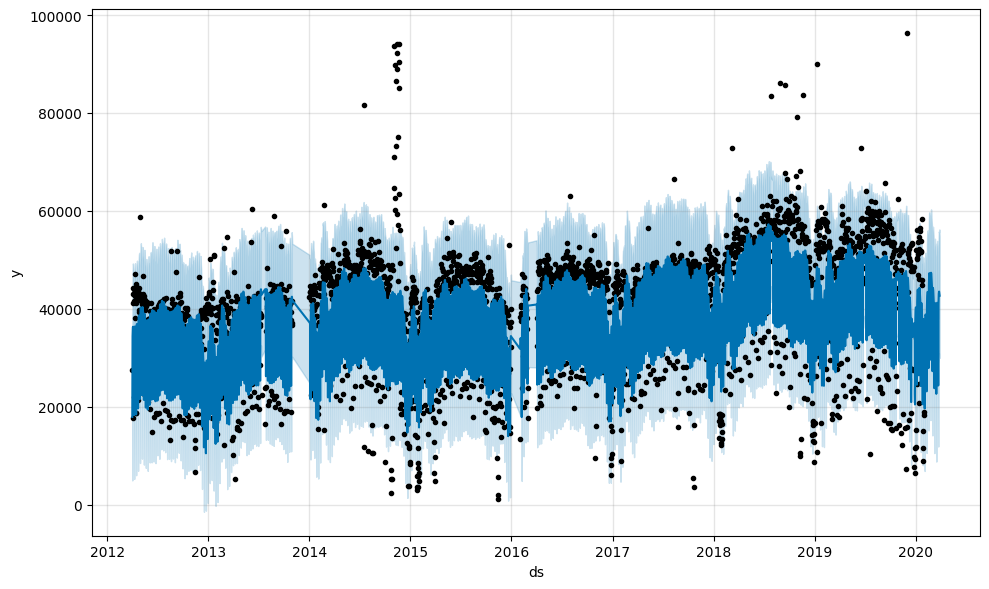

In [377]:
df_prophet=df_f_train.copy()
prop=Prophet(changepoint_prior_scale=0.1)
prop.fit(df_prophet)
future=prop.make_future_dataframe(periods=len(df_f_test))
forecast=prop.predict(future)
fig1=prop.plot(forecast)

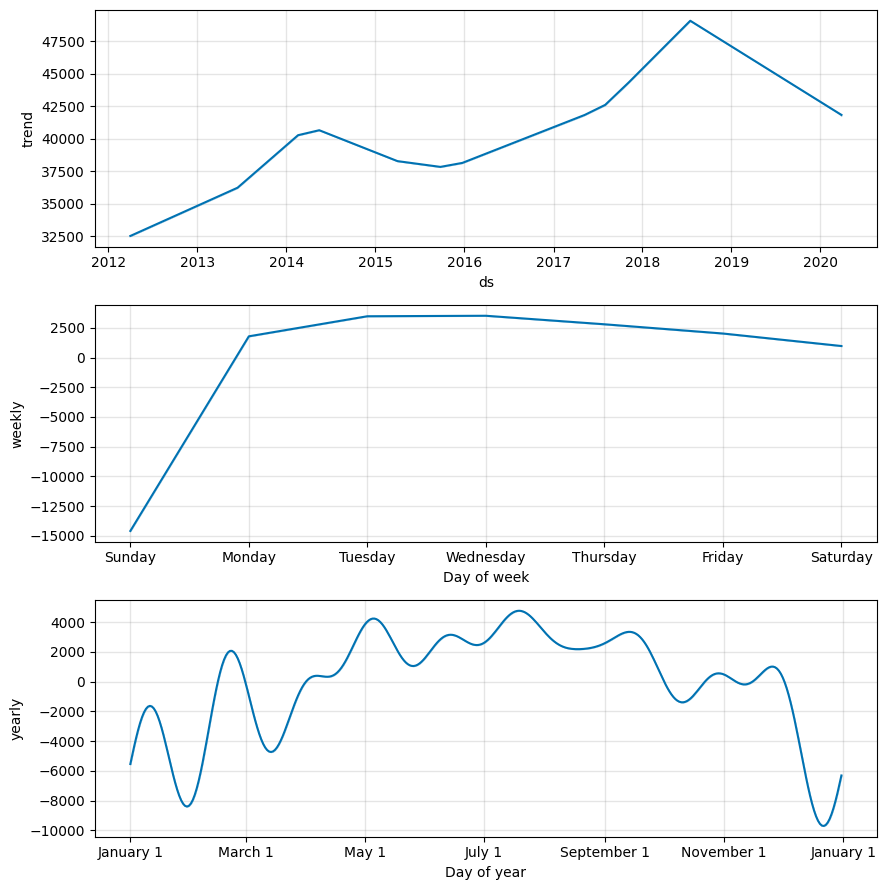

In [378]:
fig2=prop.plot_components(forecast)

In [379]:
def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [382]:
pred=forecast.iloc[-57:,-1:].reset_index(drop=True)
df_f_test=df_f_test.reset_index(drop=True)


In [383]:
for i in range(len(pred)):
    print(int(df_f_test.y[i]),int(pred.yhat[i]),i)

16504 36107 0

21780 35119 1

19994 19715 2

51590 36360 3

56913 38403 4

51011 38885 5

53386 38687 6

57659 38495 7

50817 38084 8

24433 23200 9

109523 40296 10

52960 42711 11

53890 43476 12

51678 43466 13

50077 43365 14

19159 42943 15

50518 27950 16

55526 44841 17

48703 46958 18

59273 47343 19

76010 46879 20

20656 46261 21

48030 45271 22

44836 29673 23

88464 45937 24

72302 47419 25

19121 47174 26

47573 46101 27

52499 44908 28

55327 43390 29

50324 27322 30

54969 43181 31

54466 44333 32

21419 43839 33

51342 42602 34

16819 41329 35

54268 39816 36

52641 23835 37

50897 39860 38

55787 41250 39

27806 41056 40

51963 40174 41

48007 39300 42

58656 38220 43

49046 22693 44

54520 39181 45

50815 41032 46

8830 41287 47

5633 40829 48

6980 40348 49

4155 39619 50

6856 24395 51

6498 41134 52

4785 43179 53

7738 43570 54

6195 43189 55

1589 42727 56


In [384]:
print("RMSE Score",rmse(df_f_test.y,pred.yhat))
print("MAPE Score",mean_absolute_percentage_error(df_f_test.y,pred.yhat))

RMSE Score 23240.904175708492

MAPE Score 165.6561589638453


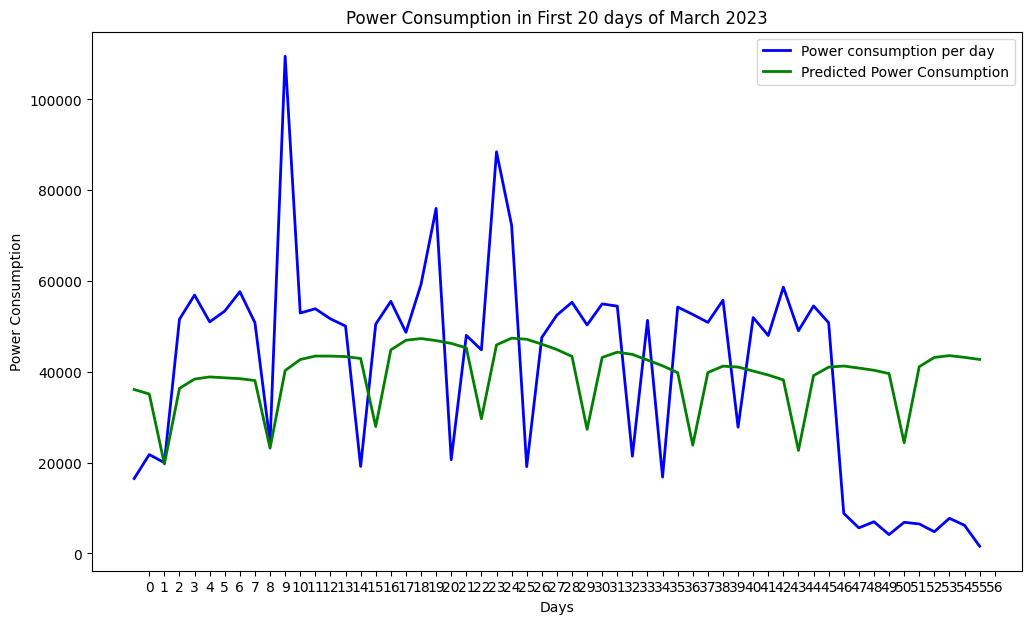

In [386]:
total1=df_f_test.y
total2=pred.yhat
xticks=np.arange(0,57,1)
x=np.arange(1,len(total1)+1)
fig,ax=plt.subplots()
plt.plot(total1,c="b",linewidth=2)
plt.plot(total2,c="g",linewidth=2)
ax.set_xticks(x,xticks)
#ax.spines[['left', 'bottom']].set_position('zero')
fig.set_size_inches(12, 7)
plt.legend(["Power consumption per day","Predicted Power Consumption"],loc="upper right")
ax.set_xlabel("Days")
ax.set_ylabel("Power Consumption")
ax.set_title("Power Consumption in First 20 days of March 2023")
plt.show()